In [2]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # 성능평가를 위함

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [22]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

## Holdout

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 8:2로 나눈다, train:test

In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf # 안 뜬다

DecisionTreeClassifier()

In [25]:
y_pred = clf.predict(X_test) # 20%의 데이터를 넣어서 제대로 분류하는지 못하는지 확인
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0])

In [9]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[45  4]
 [ 6 59]]


In [10]:
print('Accuracy')
print(accuracy_score(y_test, y_pred, normalize=True))

Accuracy
0.9122807017543859


In [13]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.94      0.91      0.92        65

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [14]:
# roc 곡선 아래 면적 출력
print('AUC')
print(roc_auc_score(y_test, y_pred))

AUC
0.9130298273155416


In [15]:
print('Mean Squared Error')
print(mean_squared_error(y_test, y_pred))

Mean Squared Error
0.08771929824561403


## K Fold Cross

In [16]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)
print(skf)  

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [17]:
for train_index, test_index in skf.split(X, y) :
    print('Train set: ', train_index)
    print('Test set: ', test_index)

Train set:  [ 25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42  43
  44  45  47  53  54  56  57  62  64  65  70  72  73  75  77  78  82  83
  85  86  87  91  94  95  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 30

In [18]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=skf)
print('K Fold Cross Validation Score')
print(scores)
print("Average Accuracy")
print(scores.mean())

K Fold Cross Validation Score
[0.89473684 0.85964912 0.9122807  0.89473684 0.89473684 0.89473684
 0.89473684 0.94736842 0.92982456 0.92857143]
Average Accuracy
0.9051378446115288


In [19]:
skf_sh = StratifiedKFold(n_splits=10, shuffle=True) # shuffle True
skf_sh.get_n_splits(X, y)
print(skf_sh)  

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [20]:
for train_index, test_index in skf_sh.split(X, y) :
    print('Train set: ', train_index)
    print('Test set: ', test_index)

Train set:  [  1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  28  29  30  31  32  33  34  35  36  37  38
  39  40  41  43  44  45  46  47  48  49  50  51  52  54  55  56  57  58
  59  60  62  63  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  99
 100 101 102 103 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 127 128 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 209 210 211 212 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 229 230 231 232 233 234 235 236
 237 238 239 240 241 243 244 245 246 247 248 249 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 26

In [21]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X, y, cv=skf_sh)
print('K Fold Cross Validation Score')
print(scores)
print("Average Accuracy")
print(scores.mean())

K Fold Cross Validation Score
[0.94736842 0.92982456 0.92982456 0.98245614 0.92982456 0.98245614
 0.94736842 0.94736842 0.92982456 0.91071429]
Average Accuracy
0.9437030075187971


## 4주차 과제

In [26]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')

In [27]:
# 2D data set
data = {"X" : [59, 49, 75, 54, 78, 56, 60, 82, 69, 83, 88, 94, 47, 65, 89, 70],
        "y" : [209, 180, 195, 192, 215, 197, 208, 189, 213, 201, 214, 212, 205, 186, 200, 204]}

data = pd.DataFrame(data)
data

,X,y
0,59,209
1,49,180
2,75,195
3,54,192
4,78,215
5,56,197
6,60,208
7,82,189
8,69,213
9,83,201


<AxesSubplot:xlabel='X', ylabel='y'>

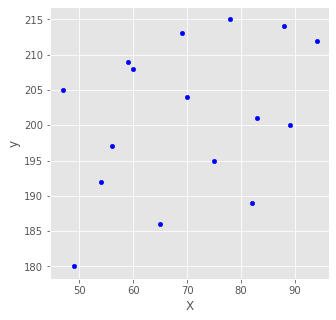

In [28]:
# Scatter plot
data.plot(kind="scatter",  
          x='X',           
          y='y',           
          figsize=(5,5),   # 가로 5인치, 세로 5인치 크기의 박스를 설정
          color="blue")    # 산점도 상의 점 색상을 파랑색으로 지정

In [29]:
# linear_model 모듈이 포함하고 있는 Linearregression() 함수를 'linear_regression'이라고 하는 변수에 할당
linear_regression = linear_model.LinearRegression()

# Linearregression()의 fit()이라는 함수를 이용하여 선형회귀 모델 훈련 실행
# 이 때 독립변수는 x, 종속변수는 y
linear_regression.fit(X = pd.DataFrame(data["X"]), y = data["y"])

# 선형 회귀식의 세로축 절편 'linear_regression.intercept_'를 구하여 출력한다.
print('a value = ', linear_regression.intercept_)

# 선형 회귀식의 기울기 'linear_regression.coef_'를 구하여 출력한다.
print('b balue =', linear_regression.coef_)

a value =  182.97249943723267
b balue = [0.26157425]


In [30]:
# 위에서 만들어진 선형회귀 모델을 적용하여 선형회귀 값을 구해본다.
# 그 값을 prediction에 할당한다.
prediction = linear_regression.predict(X = pd.DataFrame(data["X"]))

# 실제 y값과 예측한 y값을 비교하여 잔차(residuals)를 구한다.
residuals = data["y"] - prediction
print(residuals)

# 변수의 갯수(16개), 잔차의 평균값, 잔차의 표준편차, 최소값, 25% 값, 50% 값, 75% 값, 최대값을 출력한다.
residuals.describe()

0     10.594620
1    -15.789638
2     -7.590568
3     -5.097509
4     11.624709
5     -0.620657
6      9.333046
7    -15.421588
8     11.978877
9     -3.683162
10     8.008967
11     4.439521
12     9.733511
13   -13.974826
14    -6.252607
15     2.717303
Name: y, dtype: float64


count    1.600000e+01
mean     1.065814e-14
std      9.943299e+00
min     -1.578964e+01
25%     -6.587098e+00
50%      1.048323e+00
75%      9.433162e+00
max      1.197888e+01
Name: y, dtype: float64

In [31]:
# 잔차를 제곱하여 전체를 합침. 결과값을 SSE라는 변수에 할당
SSE = (residuals**2).sum()
print("SSE = ", SSE)

# y값의 표준편차를 제곱한 것을 모두 합침. 그 결과값을 SST라는 변수에 할당
SST = ((data["y"]-data["y"].mean())**2).sum()
print("SST = ", SST)

# 결정계수 R을 구함
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

SSE =  1483.038043070459
SST =  1711.0
R_squared =  0.13323317178815952


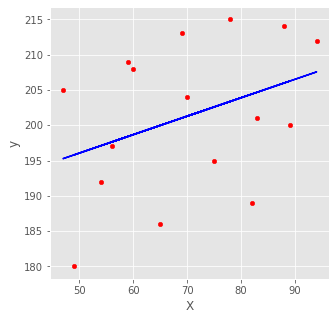

In [32]:
data.plot(kind="scatter",x="X",y="y",figsize=(5,5),color="red")

# Plot regression line
plt.plot(data["X"],prediction,color="blue")